# Clara Palacios Rodrigo

# IMPORTAR DATOS

In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
 
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)
# Find a workbook by name and open the first sheet
# Make sure you use the right name here.
sheet = client.open("DatosTFG_SistemasRecomendacion").sheet1
 
# Extract and print all of the values
list_of_hashes = sheet.get_all_records()
print(list_of_hashes)

[{'Matemática Discreta': 4, 'Diseño y Administración de Sistemas y Redes ': 4, 'Mantenimiento de Equipos Informáticos': 5, 'Sistemas Operativos': 2, 'Interacción Hombre-Máquina': 1, 'Métodos Formales': '', 'Sistemas Distribuidos': 4, 'Programación Concurrente y de Tiempo Real': 5, 'Metodología de la Programación': 5, 'Fundamentos de Organización y Gestión de Empresas': 5, 'Validación y Pruebas': '', 'Informática Básica': 4, 'Procesadores del Lenguaje': 5, 'Gestión de la Información': 5, 'Bases de Datos': 5, 'Arquitecturas Paralelas': 5, 'Gestión de Proyectos': 5, 'Desarrollo Avanzado de Sistemas Software': '', 'Programación': 2, 'Inglés Aplicado a la Informática': 4, 'Submitted At': '2018-02-21 19:25:36', 'Computación Neuronal y Evolutiva': 5, 'Análisis y Diseño de Sistemas': 4, 'Control por Computador': '', 'Algoritmia': 5, 'Fundamentos Físicos de la Informática': 4, 'Fundamentos de Computadores': 4, 'Sistemas Empotrados y de Tiempo Real': '', 'Álgebra Lineal': 3, 'Sistemas Inteligent

In [2]:
import pandas as pd

In [3]:
tabla = pd.DataFrame(data=sheet.get_all_records())


In [4]:
#listar 
lista = list(tabla.groupby(tabla.dtypes, axis=1))

In [5]:
lista

[(dtype('int64'),
      Algoritmia  Análisis y Diseño de Sistemas  Aplicaciones de Bases de Datos  \
  0            5                              4                               5   
  1            4                              1                               5   
  2            1                              1                               5   
  3            5                              2                               5   
  4            5                              1                               5   
  5            5                              3                               5   
  6            4                              1                               4   
  7            4                              1                               1   
  8            4                              3                               4   
  9            3                              2                               3   
  10           2                              3                      

# MOSTRAR SUMA DE VALORACIONES

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#obtener las sumas de las ponderaciones por asignatura
l={}
for asig in list(tabla.columns):
    tabla[asig]
    oneStars=0;
    twoStars=0;
    threeStars=0;
    fourStars=0;
    fiveStars=0;
    for i in tabla[asig] :
        if(i==5):
            fiveStars+=1;
        if(i==4):
            fourStars+=1;
        if(i==3):
            threeStars+=1;
        if(i==2):
            twoStars+=1;
        if(i==1):
            oneStars+=1;
    l[asig]=[oneStars, twoStars,threeStars,fourStars,fiveStars]
import pprint as pp
pp.pprint(l)


{'Algoritmia': [3, 4, 14, 14, 20],
 'Análisis y Diseño de Sistemas': [19, 12, 15, 8, 1],
 'Aplicaciones de Bases de Datos': [1, 1, 10, 14, 29],
 'Arquitectura de Computadores': [1, 3, 13, 24, 14],
 'Arquitecturas Paralelas': [5, 3, 20, 17, 10],
 'Bases de Datos': [1, 0, 6, 20, 28],
 'Computación Neuronal y Evolutiva': [2, 4, 5, 7, 6],
 'Control por Computador': [6, 0, 3, 2, 1],
 'Cálculo': [7, 10, 20, 15, 3],
 'Desarrollo Avanzado de Sistemas Software': [3, 1, 7, 6, 4],
 'Diseño e Implementación de Sistemas Digitales': [4, 3, 9, 5, 3],
 'Diseño y Administración de Sistemas y Redes ': [17, 12, 16, 8, 2],
 'Diseño y Mantenimiento del Software': [1, 3, 7, 10, 10],
 'Estadística': [9, 6, 26, 12, 2],
 'Estructuras de Datos': [2, 5, 10, 16, 22],
 'Fundamentos Deontológicos y Jurídicos de las TIC': [15, 15, 15, 6, 4],
 'Fundamentos Físicos de la Informática': [1, 8, 21, 20, 5],
 'Fundamentos de Computadores': [10, 5, 27, 11, 2],
 'Fundamentos de Organización y Gestión de Empresas': [5, 2, 16,

# MOSTRAR GRÁFICOS POR VALORACIONES DE CADA ASIGNATURA

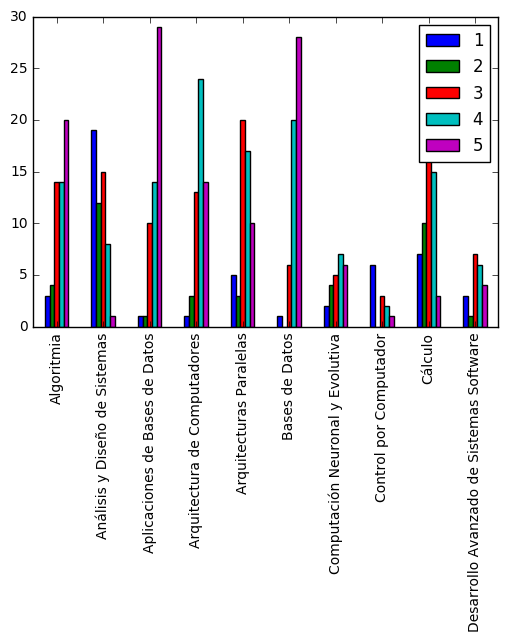

In [8]:
res=pd.DataFrame(data=l)
res=res.T
res.columns=['1','2','3','4','5']

res.head(10).plot(kind='bar')

plt.show()


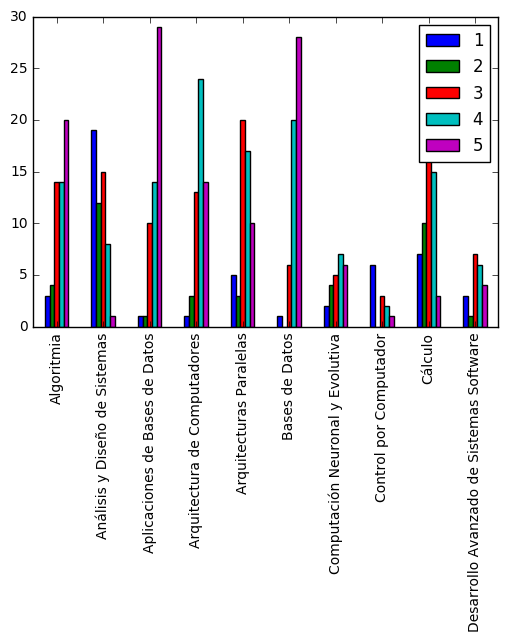

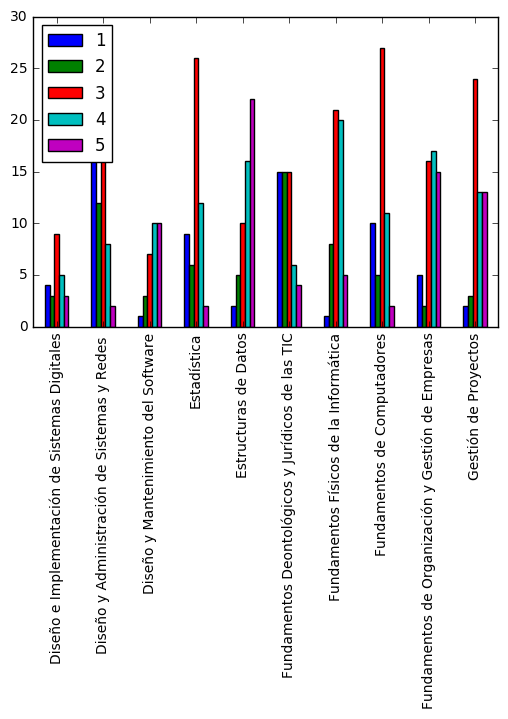

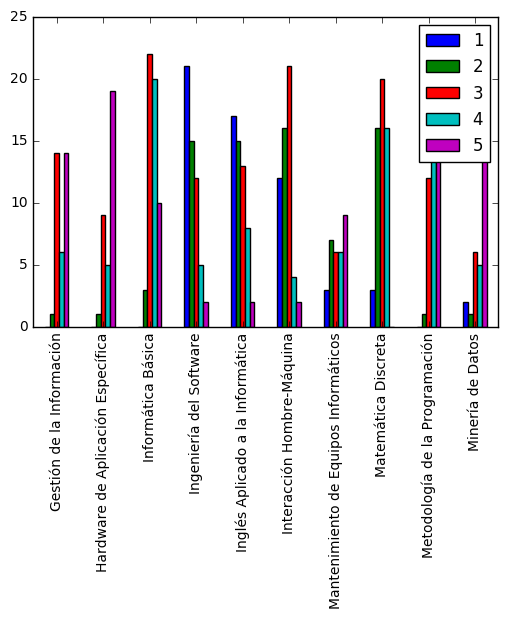

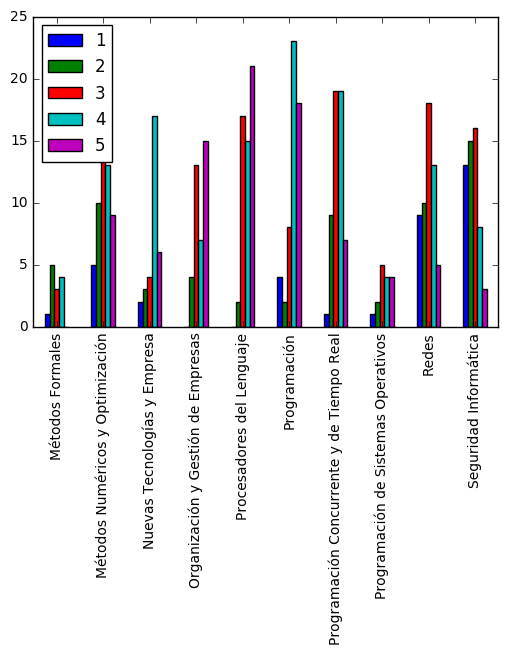

['Sistemas Distribuidos', 'Sistemas Empotrados y de Tiempo Real', 'Sistemas Inteligentes', 'Sistemas Operativos', 'Validación y Pruebas', 'Álgebra Lineal'] listaif


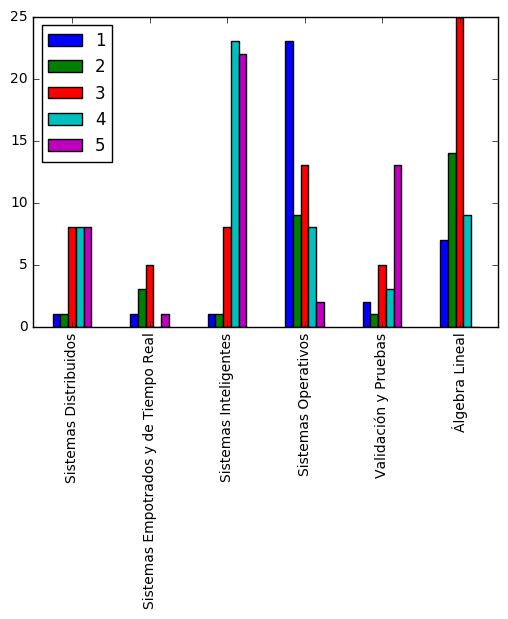

In [9]:
res2=res.T
lis=[]
count=0
for i in res2.columns:
    if i != 'Token'and i!='Submitted At':
        lis.append(i)
    if count==9:        
        newpd = res2[lis]
        newpd.T.plot(kind='bar')
        plt.show()
        lis=[]
        count=0
    else:
        count+=1
print(lis,"listaif")
newpd = res2[lis]
newpd.T.plot(kind='bar')
plt.show()

In [10]:
#almacenar en un diccionario de diccionarios cuya clave sea el usuario, y como valor un conjunto de  diccionarios
#(clave=nombre asignatura, valor=ponderacion). No introducimos el Token ni la fecha en la que se realizó el cuestionario. 
asignaturas= list(tabla.columns)
diccAsi={}
diccAsi.setdefault(1,{})
for k in asignaturas:
    if k != 'Token'and k!='Submitted At':
        for i, j in zip(tabla[k], range(len(tabla['Algoritmia'])) ):
            diccAsi.setdefault(j,{})
            diccAsi[j][k]=i


In [11]:
diccAsi

{0: {'Algoritmia': 5,
  'Análisis y Diseño de Sistemas': 4,
  'Aplicaciones de Bases de Datos': 5,
  'Arquitectura de Computadores': 5,
  'Arquitecturas Paralelas': 5,
  'Bases de Datos': 5,
  'Computación Neuronal y Evolutiva': 5,
  'Control por Computador': '',
  'Cálculo': 5,
  'Desarrollo Avanzado de Sistemas Software': '',
  'Diseño e Implementación de Sistemas Digitales': '',
  'Diseño y Administración de Sistemas y Redes ': 4,
  'Diseño y Mantenimiento del Software': '',
  'Estadística': 5,
  'Estructuras de Datos': 5,
  'Fundamentos Deontológicos y Jurídicos de las TIC': 5,
  'Fundamentos Físicos de la Informática': 4,
  'Fundamentos de Computadores': 4,
  'Fundamentos de Organización y Gestión de Empresas': 5,
  'Gestión de Proyectos': 5,
  'Gestión de la Información': 5,
  'Hardware de Aplicación Específica': 5,
  'Informática Básica': 4,
  'Ingeniería del Software': 4,
  'Inglés Aplicado a la Informática': 4,
  'Interacción Hombre-Máquina': 1,
  'Mantenimiento de Equipos Inf

In [12]:
#acceso a todas las ponderaciones de un usuario concreto en todas las asignaturas, junto con el nombre de dicha asignatura
for i in diccAsi[0]:
    print(diccAsi[0][i], i)

4 Matemática Discreta
4 Diseño y Administración de Sistemas y Redes 
5 Mantenimiento de Equipos Informáticos
2 Sistemas Operativos
1 Interacción Hombre-Máquina
 Métodos Formales
4 Sistemas Distribuidos
2 Programación
5 Metodología de la Programación
5 Programación Concurrente y de Tiempo Real
5 Bases de Datos
5 Fundamentos de Organización y Gestión de Empresas
 Validación y Pruebas
4 Informática Básica
5 Procesadores del Lenguaje
5 Gestión de la Información
5 Hardware de Aplicación Específica
5 Arquitecturas Paralelas
5 Gestión de Proyectos
 Desarrollo Avanzado de Sistemas Software
 Diseño e Implementación de Sistemas Digitales
5 Algoritmia
5 Computación Neuronal y Evolutiva
4 Análisis y Diseño de Sistemas
 Control por Computador
4 Inglés Aplicado a la Informática
4 Fundamentos Físicos de la Informática
4 Fundamentos de Computadores
 Sistemas Empotrados y de Tiempo Real
3 Álgebra Lineal
5 Sistemas Inteligentes
 Programación de Sistemas Operativos
5 Cálculo
4 Redes
5 Métodos Numéricos y

# CÁLCULO Y ALMACENAMIENTO DEL SISTEMA DE RECOMENDACIÓN EN MATRIZ DE DISTANCIAS

In [13]:
tabla1 = pd.DataFrame.from_dict(diccAsi)

In [14]:
tabla1= tabla1.T

In [15]:
#transformamos los vacíos en NaN para evitar el error de calcular el coeficiente de correlación de pearson entre un int y un string ('' equivale a un str)
tabla1= tabla1.replace('', np.nan, regex=True)

In [16]:
tabla1

,Algoritmia,Análisis y Diseño de Sistemas,Aplicaciones de Bases de Datos,Arquitectura de Computadores,Arquitecturas Paralelas,Bases de Datos,Computación Neuronal y Evolutiva,Control por Computador,Cálculo,Desarrollo Avanzado de Sistemas Software,...,Programación Concurrente y de Tiempo Real,Programación de Sistemas Operativos,Redes,Seguridad Informática,Sistemas Distribuidos,Sistemas Empotrados y de Tiempo Real,Sistemas Inteligentes,Sistemas Operativos,Validación y Pruebas,Álgebra Lineal
0,5,4,5,5,5,5,5.0,NaN,5,NaN,...,5,NaN,4,3,4.0,NaN,5,2,NaN,3
1,4,1,5,4,1,5,3.0,NaN,1,NaN,...,2,5.0,5,1,5.0,NaN,4,1,5.0,3
2,1,1,5,1,1,4,NaN,5.0,5,NaN,...,1,NaN,1,5,NaN,NaN,4,5,5.0,1
3,5,2,5,4,4,5,4.0,NaN,4,NaN,...,4,4.0,4,3,NaN,NaN,4,3,NaN,4
4,5,1,5,5,5,5,NaN,NaN,4,5.0,...,5,NaN,4,1,5.0,NaN,5,1,NaN,2
5,5,3,5,4,4,4,NaN,NaN,1,NaN,...,4,NaN,2,4,NaN,NaN,5,3,NaN,2
6,4,1,4,5,4,5,3.0,NaN,3,NaN,...,3,NaN,1,2,NaN,NaN,5,3,4.0,1
7,4,1,1,5,3,4,4.0,NaN,2,5.0,...,3,NaN,2,3,3.0,NaN,5,4,5.0,3
8,4,3,4,5,4,5,NaN,NaN,4,NaN,...,4,NaN,3,4,NaN,NaN,4,4,NaN,2
9,3,2,3,5,1,3,NaN,NaN,3,NaN,...,3,NaN,1,3,NaN,NaN,3,1,NaN,1


In [17]:
def med_pond(tabla, list1):
    return tabla[list1].mean()

In [18]:
def med_pond_ix(tabla, list1):
    return tabla.ix[list1].mean()

In [19]:
def coef_corr_pearson(tabla1, usu1, usu2, rows=True):
    if rows: 
        #almacenamiento en un array de arrays las listas con las respuestas no vacías de ambos usuarios
        listUsu= tabla1.ix[[usu1,usu2]].dropna(axis=1).as_matrix()
        usu1_med=med_pond_ix(tabla1, usu1)
        usu2_med=med_pond_ix(tabla1, usu2)
    else:
        listUsu= tabla1[[usu1,usu2]].dropna(axis=0).as_matrix().T
        usu1_med= med_pond(tabla1, usu1)
        usu2_med= med_pond(tabla1, usu2)
    if listUsu.any():
        
        correl_pearson= np.dot(listUsu[0,:] - usu1_med, listUsu[1,:]-usu2_med)/(np.sqrt(np.dot(listUsu[0,:]-usu1_med, listUsu[0, :]-usu1_med))*
        np.sqrt(np.dot(listUsu[1,:]-usu2_med, listUsu[1, :]-usu2_med)))
        if np.isnan(correl_pearson):
            return 0
        else:
            return correl_pearson
    else:
        return 0
        

In [20]:
def matriz_sim(tabla, correl_pearson=coef_corr_pearson ):
    matrizSim={}
    listaAsign= tabla.columns.tolist()
    
    for asign in listaAsign:
        otrasAsign= listaAsign[listaAsign.index(asign): len(listaAsign)]
        matrizSim[asign]= dict([(asign2, correl_pearson(tabla, asign, asign2, rows=False)) for asign2 in otrasAsign])
    for asign in listaAsign:
        
        
        
        otrasAsign= listaAsign[listaAsign.index(asign): len(listaAsign)]
        for asign2 in otrasAsign:
            matrizSim[asign2][asign]= matrizSim[asign][asign2]
    return matrizSim
        

In [21]:
matrizSim= pd.DataFrame(matriz_sim(tabla1))

# PREDICCIÓN Y RECOMENDACIÓN

In [22]:
def mezl_dat(tabla1, matrizSim, usu, asignatura):
    vot_usu= pd.isnull(tabla1.ix[usu])
    vot_usu[asignatura]=True
    for i,k,j in zip(matrizSim[asignatura],tabla1.ix[usu],vot_usu):
        if j== False:
            yield (k, i)

In [23]:
def predicc_usu_asign(listDatos, n):
    divis=0.0
    div=0.0
    for i in listDatos[0: n]:
        if i[1]>0:
            div+=abs(i[1])
            divis+=(i[1]*i[0])
    return divis/div if div!=0 else 0

In [75]:
def dev_recom_productos(tabla1, matrizSim, asignatura, usu, n):
    listDatos=list(mezl_dat(tabla1,matrizSim,usu, asignatura))
    listDatos.sort(key=lambda x:x[1],reverse=True)
    return round(predicc_usu_asign(listDatos,n),0)

In [76]:
dev_recom_productos(tabla1,matrizSim,str('Algoritmia'),2,10)


3.0

# GUARDAR DATOS

In [38]:
#formato CSV
#tabla1.to_csv('datos.data')

In [39]:
#formato binario
import pickle
 
def guardarDatos(nombreArchivo, tabla1):
    archivo = open(nombreArchivo, "wb")
    pickle.dump(tabla1, archivo)
    archivo.close()

In [40]:
guardarDatos('archivoDatos.bin', tabla1)

# LECTURA DATOS 

In [41]:
#formato binario
def recuperarDatos(nombreArchivo):
    archivo = open(nombreArchivo, "rb")
    tablaDatos = pickle.load(archivo)
    archivo.close()
    return tablaDatos

In [42]:
tablaDatos= recuperarDatos('archivoDatos.bin')

In [43]:
#formato CSV
#tablaDatosCSV=pd.read_csv('datos.data', index_col=0)